In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [6]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
import pandas as pd

In [25]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
df['target'] = data.target

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df[df.target==0].count()

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
target               50
dtype: int64

In [32]:
df = df.drop(["sepal length (cm)", "sepal width (cm)"], axis=1)

In [33]:
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [21]:
import matplotlib.pyplot as plt

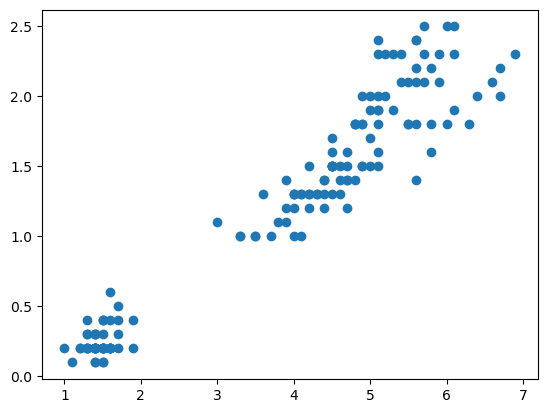

In [34]:
plt.scatter(df["petal length (cm)"], df['petal width (cm)'])

In [66]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, n_init=10)

In [67]:
cluster_prec = model.fit_predict(df[["petal length (cm)","petal width (cm)"]])

C:\Users\Szymon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
cluster_prec

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
df['cluster'] = cluster_prec

In [70]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

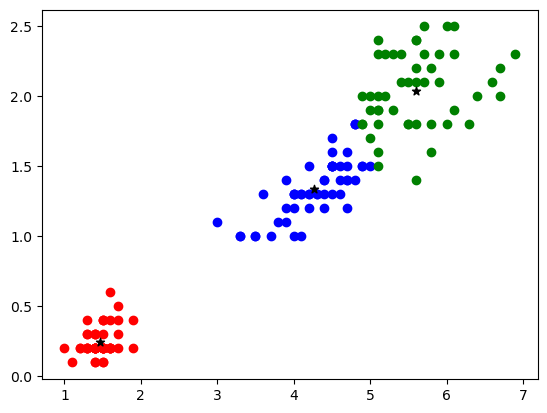

In [75]:
#MODEL
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color="black", marker="*")

In [72]:
model.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

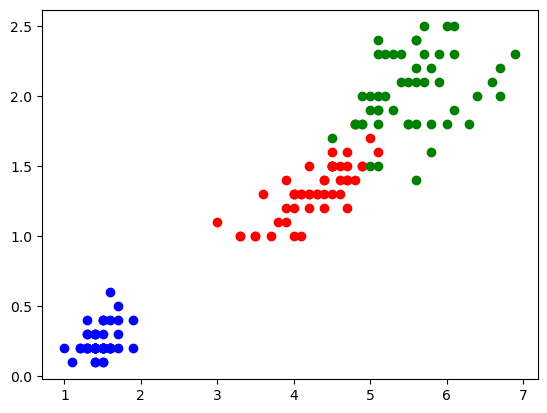

In [77]:
#TRUTH
pdf0 = df[df.target==0]
pdf1 = df[df.target==1]
pdf2 = df[df.target==2]
plt.scatter(pdf0['petal length (cm)'],pdf0['petal width (cm)'],color='blue')
plt.scatter(pdf1['petal length (cm)'],pdf1['petal width (cm)'],color='red')
plt.scatter(pdf2['petal length (cm)'],pdf2['petal width (cm)'],color='green')

In [50]:
df.head()

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


In [55]:
sse = []
for k in range(1,11):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(model.inertia_)

sse

C:\Users\Szymon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Szymon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Szymon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Szymon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

[550.8953333333334,
 86.39021984551397,
 31.371358974358984,
 19.465989010989013,
 13.916908757908757,
 11.040239971910452,
 9.244804827285606,
 7.6241930625797245,
 6.545263125763126,
 5.551913395641017]

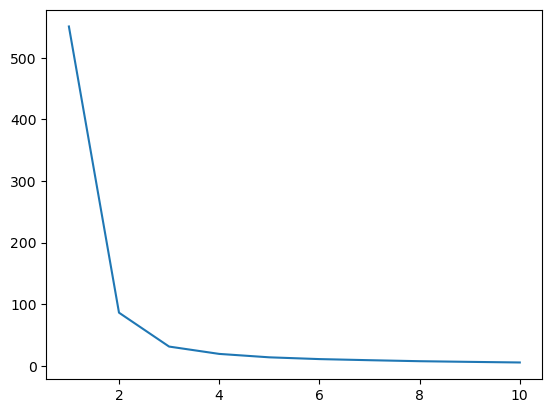

In [64]:
import numpy as np
x = np.linspace(1,10,10)
plt.plot(x,sse)

In [78]:
'''
Scaling the data!
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
'''

"\nScaling the data!\nscaler = MinMaxScaler()\n\nscaler.fit(df[['Income($)']])\ndf['Income($)'] = scaler.transform(df[['Income($)']])\n\nscaler.fit(df[['Age']])\ndf['Age'] = scaler.transform(df[['Age']])\n"